In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/silent-speech-emg/Silent Speech EMG/Silent speech/emg_wasem.txt
/kaggle/input/silent-speech-emg/Silent Speech EMG/Silent speech/emg_nikita_butiaev.txt
/kaggle/input/silent-speech-emg/Silent Speech EMG/Silent speech/emg_glazyrin_semion.txt
/kaggle/input/silent-speech-emg/Silent Speech EMG/Silent speech/emg_saudi.txt
/kaggle/input/silent-speech-emg/Silent Speech EMG/Voice speech/emg_wasem.txt
/kaggle/input/silent-speech-emg/Silent Speech EMG/Voice speech/emg_nikita_butiaev.txt
/kaggle/input/silent-speech-emg/Silent Speech EMG/Voice speech/emg_glazyrin_semion.txt
/kaggle/input/silent-speech-emg/Silent Speech EMG/Voice speech/emg_saudi.txt


In [2]:
# Import required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# import required library
import pandas as pd

# function to read data from text file
def read_data_from_file(file_path):
    try:
        # read file
        data = pd.read_csv(file_path, delimiter = "\t") 
        return data
    except FileNotFoundError:
        return "File Not Found"
    except Exception as e:
        return str(e)

# call the function
file_path = '/kaggle/input/silent-speech-emg/Silent Speech EMG/Silent speech/emg_saudi.txt' # replace with your file path
data = read_data_from_file(file_path)
print(data)


        1.0802695751190186,0.0
0     1.2365453243255615,649.0
1       1.2990167140960693,0.0
2     1.3615357875823975,650.0
3       1.4083952903747559,0.0
4     1.4709129333496094,651.0
...                        ...
3100  239.47868704795837,602.0
3101    239.58805418014526,0.0
3102   239.7130446434021,554.0
3103      239.822429895401,0.0
3104  239.93180465698242,490.0

[3105 rows x 1 columns]


In [4]:
# Split the column into two
data[['time', 'emg_value']] = data.iloc[:,0].str.split(',', expand=True)

# Convert the columns to the appropriate data types
data['time'] = pd.to_numeric(data['time'])
data['emg_value'] = pd.to_numeric(data['emg_value'])

# Display the DataFrame
print(data)

        1.0802695751190186,0.0        time  emg_value
0     1.2365453243255615,649.0    1.236545      649.0
1       1.2990167140960693,0.0    1.299017        0.0
2     1.3615357875823975,650.0    1.361536      650.0
3       1.4083952903747559,0.0    1.408395        0.0
4     1.4709129333496094,651.0    1.470913      651.0
...                        ...         ...        ...
3100  239.47868704795837,602.0  239.478687      602.0
3101    239.58805418014526,0.0  239.588054        0.0
3102   239.7130446434021,554.0  239.713045      554.0
3103      239.822429895401,0.0  239.822430        0.0
3104  239.93180465698242,490.0  239.931805      490.0

[3105 rows x 3 columns]


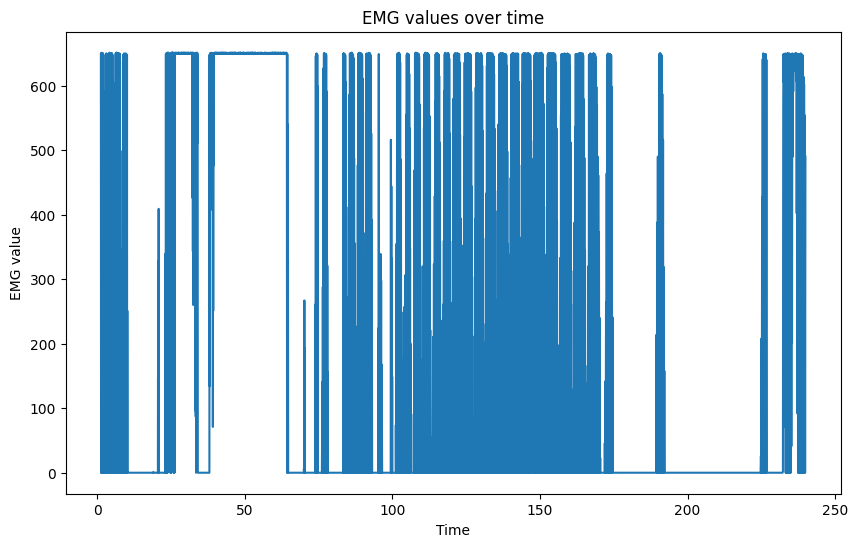

In [5]:
# Import required libraries
import matplotlib.pyplot as plt

# Create a figure and plot
plt.figure(figsize=(10,6))
plt.plot(data['time'], data['emg_value'])

# Add title and labels
plt.title('EMG values over time')
plt.xlabel('Time')
plt.ylabel('EMG value')

# Display the plot
plt.show()

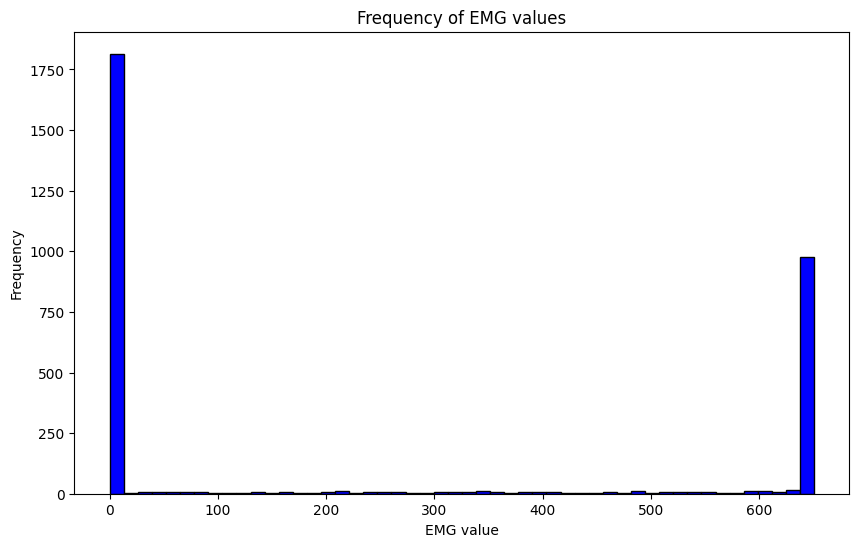

In [6]:
# Import required libraries
import matplotlib.pyplot as plt

# Create a figure and plot
plt.figure(figsize=(10,6))
plt.hist(data['emg_value'], bins=50, color='blue', edgecolor='black')

# Add title and labels
plt.title('Frequency of EMG values')
plt.xlabel('EMG value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

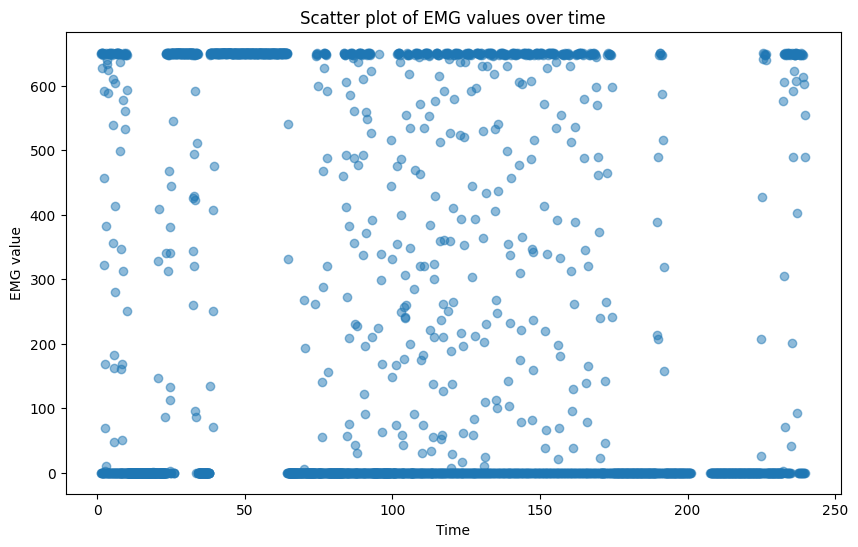

In [7]:
# Import required libraries
import matplotlib.pyplot as plt

# Create a figure and plot
plt.figure(figsize=(10,6))
plt.scatter(data['time'], data['emg_value'], alpha=0.5)

# Add title and labels
plt.title('Scatter plot of EMG values over time')
plt.xlabel('Time')
plt.ylabel('EMG value')

# Display the plot
plt.show()

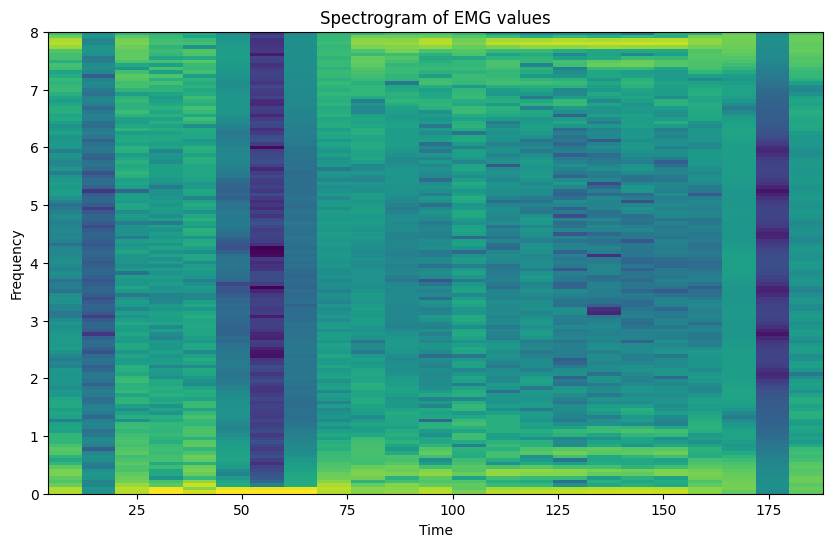

In [8]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np

# Convert your data to numpy arrays
time = np.array(data['time'])
emg_value = np.array(data['emg_value'])

# Create a figure and plot
plt.figure(figsize=(10,6))
plt.specgram(emg_value, Fs=1.0/(time[1]-time[0]))

# Add title and labels
plt.title('Spectrogram of EMG values')
plt.xlabel('Time')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [9]:
#Remove Noise
from scipy.signal import butter, filtfilt

# Define the bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Apply the bandpass filter to your data
lowcut = 20.0
highcut = 450.0
fs = 1000.0  # the sampling frequency of your data
data['emg_value'] = butter_bandpass_filter(data['emg_value'], lowcut, highcut, fs)

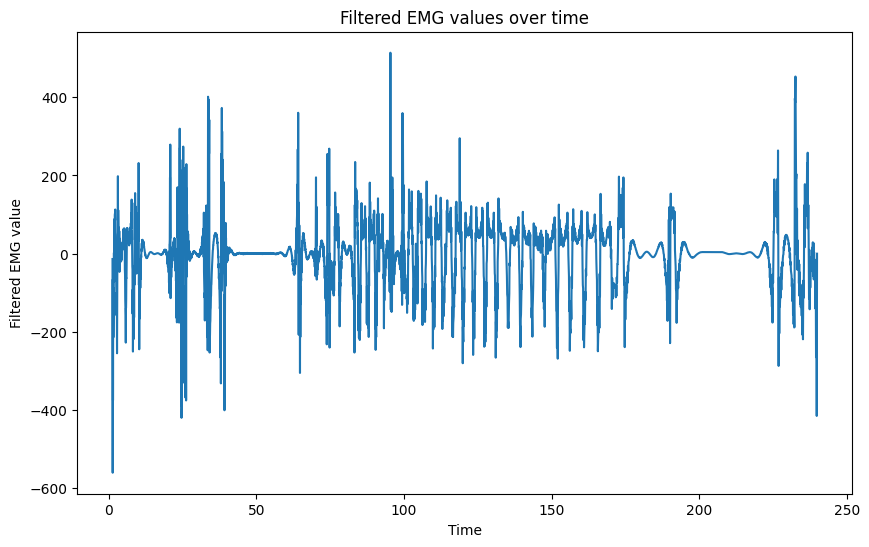

In [10]:
# Import required libraries
import matplotlib.pyplot as plt

# Create a figure and plot
plt.figure(figsize=(10,6))
plt.plot(data['time'], data['emg_value'])

# Add title and labels
plt.title('Filtered EMG values over time')
plt.xlabel('Time')
plt.ylabel('Filtered EMG value')

# Display the plot
plt.show()

In [11]:
#Normalize the Data
data['emg_value'] = (data['emg_value'] - data['emg_value'].mean()) / data['emg_value'].std()

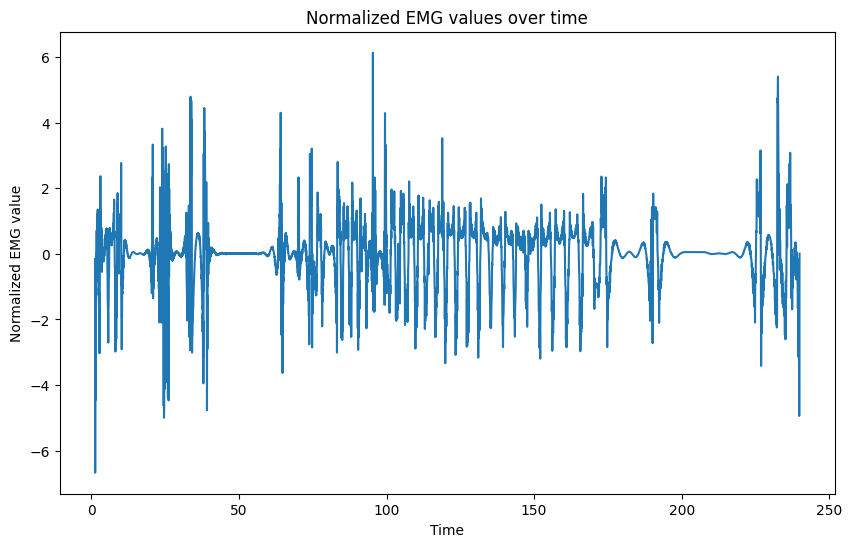

In [12]:
# Import required libraries
import matplotlib.pyplot as plt

# Create a figure and plot
plt.figure(figsize=(10,6))
plt.plot(data['time'], data['emg_value'])

# Add title and labels
plt.title('Normalized EMG values over time')
plt.xlabel('Time')
plt.ylabel('Normalized EMG value')

# Display the plot
plt.show()

In [13]:
#Segment the Data
# Define the window size and step size
window_size = 100  # the number of data points in each window
step_size = 50  # the number of data points to step for each new window

# Segment the data
windows = []
for i in range(0, len(data) - window_size, step_size):
    window = data['emg_value'].iloc[i:i+window_size]
    windows.append(window)

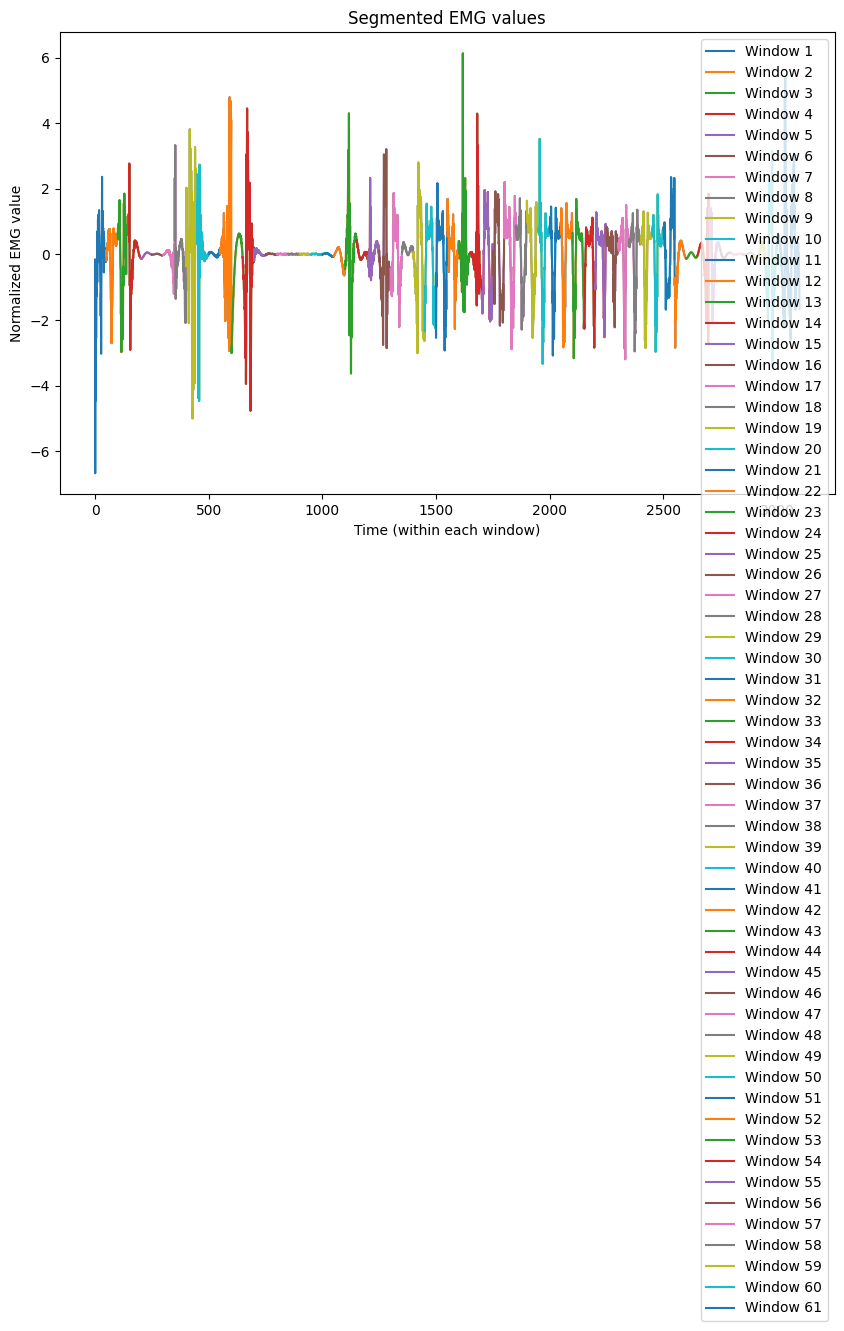

In [14]:
# Import required libraries
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10,6))

# Plot each window
for i, window in enumerate(windows):
    plt.plot(window, label=f'Window {i+1}')

# Add title and labels
plt.title('Segmented EMG values')
plt.xlabel('Time (within each window)')
plt.ylabel('Normalized EMG value')

# Optionally, add a legend
plt.legend()

# Display the plot
plt.show()

In [15]:
X = np.array(data['emg_value']).reshape(-1, 1)


y = np.random.choice([0, 1], size=len(data))
y = to_categorical(y, num_classes=2)  # one-hot encode the labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Print the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2484, 1)
y_train shape: (2484, 2)
X_test shape: (621, 1)
y_test shape: (621, 2)


In [17]:
# Define the neural network model
model = Sequential()
model.add(Dense(32, input_dim=1, activation='relu'))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(2, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1186 (4.63 KB)
Trainable params: 1186 (4.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)

Epoch 1/30
78/78 [==============================] - 1s 5ms/step - loss: 0.6948 - accuracy: 0.4831 - val_loss: 0.6940 - val_accuracy: 0.5346
Epoch 2/30
78/78 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5085 - val_loss: 0.6968 - val_accuracy: 0.4718
Epoch 3/30
78/78 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4815 - val_loss: 0.6957 - val_accuracy: 0.4718
Epoch 4/30
78/78 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4960 - val_loss: 0.6948 - val_accuracy: 0.4734
Epoch 5/30
78/78 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5056 - val_loss: 0.6948 - val_accuracy: 0.4718
Epoch 6/30
78/78 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4984 - val_loss: 0.6951 - val_accuracy: 0.4718
Epoch 7/30
78/78 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5028 - val_loss: 0.6948 - val_accuracy: 0.4718
Epoch 8/30
78/78 [==

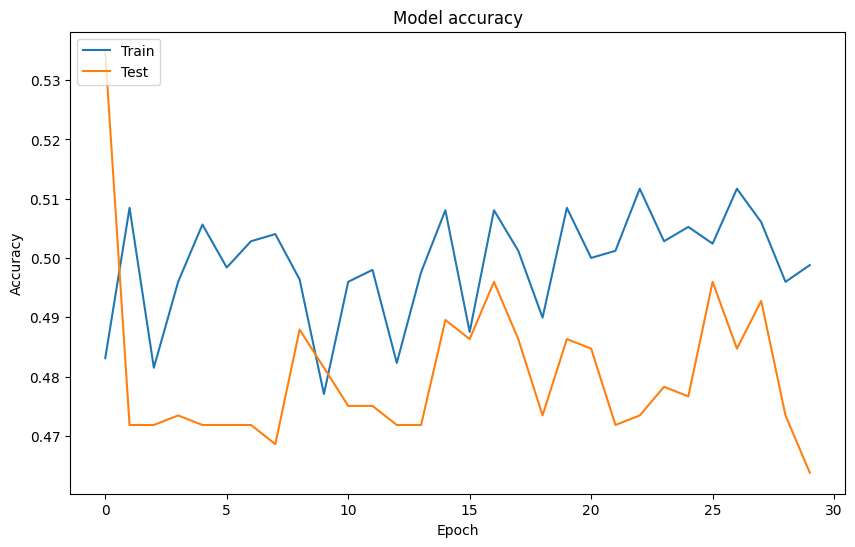

In [19]:
# Plot the training and validation accuracy
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test accuracy: {test_accuracy*100:.2f}%')

Test accuracy: 46.38%
